<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Modelos_de_Aprendizaje_Automatico-IMCA/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
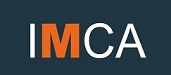


---


# CLASE: DESCOMPOSICION DE VALORES SINGULARES SVD

SVD (Singular Value Decomposition, por sus siglas en inglés) es una descomposición matricial que juega un rol fundamental en muchos campos de la matemática, ciencia de datos, procesamiento de señales, y más. En términos simples, descompone una matriz en tres componentes fundamentales. Matemáticamente, si tenemos una matriz AA de tamaño mxn, entonces la descomposición SVD se puede expresar como:

$$A=UΣV^{t}$$

Donde:
* $U$ es una matriz ortogonal de tamaño m×m. Sus columnas son los vectores singulares izquierdos de A.

* $Σ$ es una matriz diagonal de tamaño m×n, cuyas entradas son los valores singulares de A. Estos valores singulares son números no negativos que proporcionan información sobre las propiedades geométricas de la matriz.

* $V^{t}$ (la traspuesta de V) es una matriz ortogonal de tamaño n×n, cuyas columnas son los vectores singulares derechos de A.


    
    


#########    USO DE LIBRERIA PYTHON PARA CALCULO DE SVD    ##########

Imprime dim de la Imagen en escala grises:(260, 194)
Imprime matriz Imagen
[[160 168 178 ... 191 190 190]
 [162 170 179 ... 191 190 190]
 [164 172 181 ... 191 190 190]
 ...
 [189 239 237 ... 235 240 240]
 [177 199 178 ... 240 250 250]
 [166 219 202 ... 251 243 243]]

Imprime dimensiones de la Matriz U:(260, 194)
Matriz U:
[[-6.83450881e-02 -3.22169817e-02  5.41360120e-02 ... -3.65890537e-02
   6.65576904e-02  1.24180764e-02]
 [-6.83796158e-02 -3.16774812e-02  5.29192760e-02 ...  7.26286237e-02
   2.24203952e-02  8.39811736e-02]
 [-6.84839598e-02 -3.09941088e-02  5.17518585e-02 ... -8.60457647e-03
  -6.20729312e-02  1.03392741e-01]
 ...
 [-8.84918766e-02 -5.18839846e-02  7.13306178e-02 ... -7.03286584e-03
  -1.97874815e-03 -2.22749199e-02]
 [-8.81944155e-02 -5.34229941e-02  6.60759865e-02 ...  2.84215834e-02
  -1.61147391e-02 -3.25725314e-03]
 [-8.83706455e-02 -5.35571531e-02  6.56145948e-02 ... -1.29920161e-02
  -8.

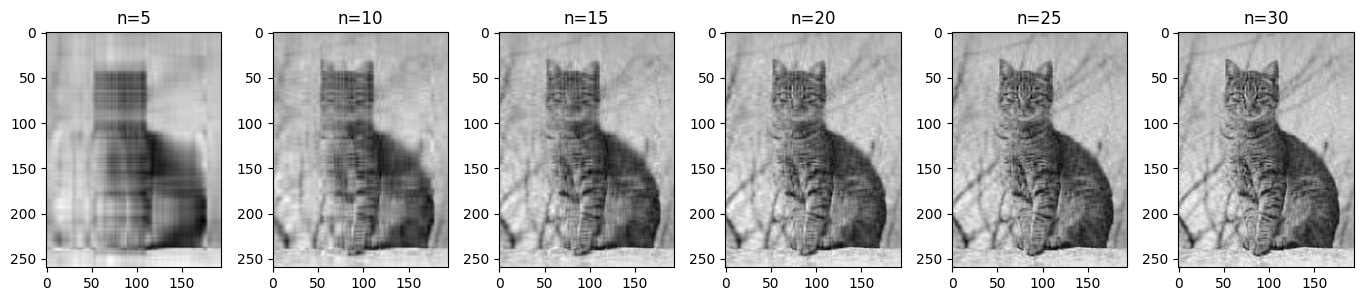

In [12]:
from sklearn.decomposition import PCA #libreria para calculo SVD
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

print("#########    USO DE LIBRERIA PYTHON PARA CALCULO DE SVD    ##########\n")
#lee el archvio gato.jpg y lo pasa a formato de grises
image = cv2.imread('gato.jpeg',cv2.IMREAD_GRAYSCALE)
print(f"Imprime dim de la Imagen en escala grises:{image.shape}")
print("Imprime matriz Imagen")
print(image)
print("")

#hace la descomposicion de valores singulares
U,S,Vt=np.linalg.svd(image,full_matrices=False)
print(f"Imprime dimensiones de la Matriz U:{U.shape}")
print("Matriz U:")
print(U)
print("")
print(f"Imprime dimensiones de la Matriz S:{S.shape}")
print("Matriz S:")
print(S)
print("")
print(f"Imprime dimensiones de la Matriz Vt:{Vt.shape}")
print("Matriz Vt:")
print(Vt)
print("")

#primero 10 valores de S
print("Primeros 10 valores de S:")
print(S[:10])
print("")

#los 10 ultimos valores de S
print("Ultimos 10 valores de S:")
print(S[-10:])
print("")

plt.figure(figsize=(16,4))
start,end,step=5,35,5
for i in range(start,end,step):
  plt.subplot(1,(end-start)//step+1,(i-start)//step+1)
  reconstructed=np.matrix(U[:,:i])*np.diag(S[:i])*np.matrix(Vt[:i,:])
  plt.imshow(reconstructed,cmap='gray')
  plt.title('n='+str(i))
plt.tight_layout()
plt.show()

#####   USO DE LIBRERIA PYTHON PARA SEPARAR X CANAL RGB DE IMAGENES   #####

Dimension de la matriz de la imagen Original:
(260, 194, 3)

Dimensiones de la matriz B:(260, 194)
Matriz B:
[[174 182 194 ... 210 209 208]
 [176 184 195 ... 210 208 208]
 [180 188 197 ... 210 208 208]
 ...
 [170 220 221 ... 228 236 236]
 [158 180 162 ... 233 246 246]
 [147 200 186 ... 244 239 239]]

Dimensiones de la matriz G:(260, 194)
Matriz G:
[[163 171 181 ... 194 192 192]
 [165 173 182 ... 194 192 192]
 [167 175 184 ... 194 192 192]
 ...
 [189 239 237 ... 236 239 239]
 [177 199 178 ... 241 249 249]
 [166 219 202 ... 252 242 242]]

Dimensiones de la matriz R:(260, 194)
Matriz R:
[[149 157 167 ... 178 179 179]
 [151 159 168 ... 178 179 179]
 [153 161 170 ... 178 179 179]
 ...
 [196 246 244 ... 236 244 244]
 [184 206 185 ... 241 254 254]
 [173 226 209 ... 252 247 247]]



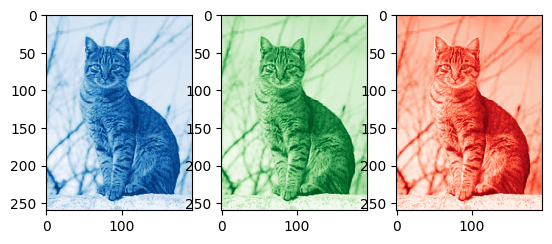

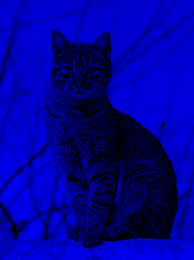

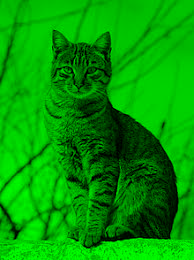

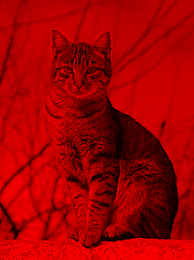

In [21]:
from google.colab.patches import cv2_imshow  # Esta es la función para mostrar imágenes en Colab

#separar la imagen por cada canal RGB
print("#####   USO DE LIBRERIA PYTHON PARA SEPARAR X CANAL RGB DE IMAGENES - 1  #####\n")
#lectura de la imagen en formato RGB (en colores)
color_image=cv2.imread('gato.jpeg')
#separacion de los canales RGB
B,G,R=cv2.split(color_image)
print("Dimension de la matriz de la imagen Original:")
print(color_image.shape)
print("")
print(f"Dimensiones de la matriz B:{B.shape}")
print("Matriz B:")
print(B)
print("")
print(f"Dimensiones de la matriz G:{G.shape}")
print("Matriz G:")
print(G)
print("")
print(f"Dimensiones de la matriz R:{R.shape}")
print("Matriz R:")
print(R)
print("")

#plotea cada canal, pero se le asigna un color
plt.subplot(1,3,1)
plt.imshow(B,cmap='Blues_r')

plt.subplot(1,3,2)
plt.imshow(G,cmap='Greens_r')

plt.subplot(1,3,3)
plt.imshow(R,cmap='Reds_r')

plt.show()

# Crear imágenes para cada canal
# Para el canal azul: dejamos B tal como está, pero G y R los ponemos a cero
azul = cv2.merge([B, np.zeros_like(G), np.zeros_like(R)])

# Para el canal verde: dejamos G tal como está, pero B y R los ponemos a cero
verde = cv2.merge([np.zeros_like(B), G, np.zeros_like(R)])

# Para el canal rojo: dejamos R tal como está, pero B y G los ponemos a cero
rojo = cv2.merge([np.zeros_like(B), np.zeros_like(G), R])

# Mostrar los canales por separado usando cv2_imshow
cv2_imshow(azul)  # Canal Azul
cv2_imshow(verde)  # Canal Verde
cv2_imshow(rojo)  # Canal Rojo

In [ ]:
from google.colab.patches import cv2_imshow  # Esta es la función para mostrar imágenes en Colab

#separar la imagen por cada canal RGB
print("#####   USO DE LIBRERIA PYTHON PARA SEPARAR X CANAL RGB DE IMAGENES - 2  #####\n")
#lectura de la imagen en formato RGB (en colores)

img=cv2.cvtColor(cv2.imread('fractal.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

R,G,B=cv2.split(img)
fig=plt.figure(figsize=(16,8))

fig.add_subplot(131)
plt.title('Fra_azul')
plt.imshow(B)

fig.add_subplot(132)
plt.title('Fra_verde')
plt.imshow(G)

fig.add_subplot(133)
plt.title('Fra_rojo')
plt.imshow(R)

plt.show()

print("\nIMPRESION POR CANALES DE RGB\n")
# Crear imágenes para cada canal
# Para el canal azul: dejamos B tal como está, pero G y R los ponemos a cero
azul = cv2.merge([B, np.zeros_like(G), np.zeros_like(R)])

# Para el canal verde: dejamos G tal como está, pero B y R los ponemos a cero
verde = cv2.merge([np.zeros_like(B), G, np.zeros_like(R)])

# Para el canal rojo: dejamos R tal como está, pero B y G los ponemos a cero
rojo = cv2.merge([np.zeros_like(B), np.zeros_like(G), R])

# Mostrar los canales por separado usando cv2_imshow
cv2_imshow(azul)  # Canal Azul
cv2_imshow(verde)  # Canal Verde
cv2_imshow(rojo)  # Canal Rojo

(1000, 1520, 3)
(1000, 100) (1000, 100) (1000, 100)
Azul Chanel:0.9881445858820421
Verde Chanel:0.9684501991173322
Rojo Chanel:0.9910740997379504
(1000, 1520) (1000, 1520) (1000, 1520)
(1000, 1520, 3)


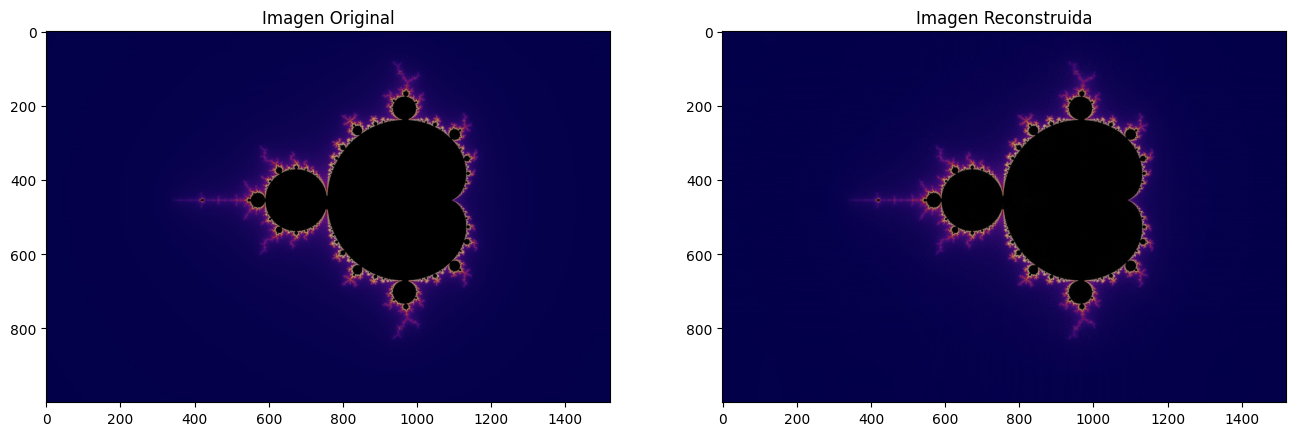

In [30]:
print(img.shape)

df_blue=blue/255
df_green=green/255
df_red=red/255

pca_b=PCA(n_components=100)
pca_g=PCA(n_components=100)
pca_r=PCA(n_components=100)

pca_b.fit(df_blue)
pca_g.fit(df_green)
pca_r.fit(df_red)

trans_pca_b=pca_b.transform(df_blue)
trans_pca_g=pca_g.transform(df_green)
trans_pca_r=pca_r.transform(df_red)

#impresion de las dimensiones
print(trans_pca_b.shape,trans_pca_g.shape,trans_pca_r.shape)

#valores singulares para cada PCA
pca_b.singular_values_
pca_g.singular_values_
pca_r.singular_values_

#porcentaje de varianza
print(f"Azul Chanel:{pca_b.explained_variance_ratio_.sum()}")
print(f"Verde Chanel:{pca_g.explained_variance_ratio_.sum()}")
print(f"Rojo Chanel:{pca_r.explained_variance_ratio_.sum()}")

#recuperacion de las matricez con la dimension inicial
b_arr=pca_b.inverse_transform(trans_pca_b)
g_arr=pca_g.inverse_transform(trans_pca_g)
r_arr=pca_r.inverse_transform(trans_pca_r)

print(b_arr.shape,g_arr.shape,r_arr.shape)

img_reconstructed=cv2.merge((b_arr, g_arr, r_arr))
print(img_reconstructed.shape)

fig=plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.title('Imagen Original')
plt.imshow(img)
fig.add_subplot(122)
plt.title('Imagen Reconstruida')
plt.imshow(img_reconstructed)

plt.show()


In [ ]:
#cargar caracteristica de vino.csv
df=pd.read_csv('caracteristicas de vinos.csv')

print(df.shape)

print(df.head(20))

(178, 14)
    Vino  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1      2    13.20   1.78  2.14        11.2        100     2.65        2.76   
2      3    13.16   2.36  2.67        18.6        101     2.80        3.24   
3      4    14.37   1.95  2.50        16.8        113     3.85        3.49   
4      5    13.24   2.59  2.87        21.0        118     2.80        2.69   
5      6    14.20   1.76  2.45        15.2        112     3.27        3.39   
6      7    14.39   1.87  2.45        14.6         96     2.50        2.52   
7      8    14.06   2.15  2.61        17.6        121     2.60        2.51   
8      9    14.83   1.64  2.17        14.0         97     2.80        2.98   
9     10    13.86   1.35  2.27        16.0         98     2.98        3.15   
10    11    14.10   2.16  2.30        18.0        105     2.95        3.32   
11    12    14.12   1.48  2.32        16.8         95 